

# Project 2: TMDb Movie Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, you'll go through the analysis of TMDb movie data using NumPy, pandas, and matplotlib.
This dataset contains information about 10,000 movies collected from the movie database (TMDb) and also contains many features which are id, budget, revenue, original_title, cast, etc.

### Questions:
<ol>
<li>Which year has the highest release of movies?</li>
<li>What is the highest revenue movie?</li>
<li>What is the least revenue movie?</li>
<li>What is the average revenue of the movies?</li>
<li>What is the average runtime of all movies?</li>
<li>What is the highest budget movie?</li>
<li>What is the least budget movie?</li>
<li>What is the average Budget of the movies?</li>
</ol>




## Importing Libraries



In [158]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

<ul><li>load in the data.</li>
<li>check for cleanliness.</li>
<li>trim and clean dataset for analysis. </li></ul>


### General Properties

In [159]:
#load the data.
df = pd.read_csv('/Users/batoul/Desktop/tmdb-movies.csv')

#printing out a few lines.
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [160]:
df.shape


(10866, 21)

 Consists of 10866 records and 21 columns or features 

In [161]:
# check which columns have missing values with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [162]:
# check the datatypes.
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning 

In [163]:
# show columns in data set.
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [164]:
#Remove the unused columns.
drop_columns = ['imdb_id','cast','homepage', 'director','tagline','genres' ,'keywords', 'overview', 'production_companies']
df = df.drop(drop_columns,axis=1)

In [165]:
# show columns in data set.
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [166]:
df.shape

(10866, 12)

In [167]:
# check for duplicates in the data
sum(df.duplicated())

1

In [168]:
# drop duplicates
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [169]:
# Check for null values. 
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [170]:
# clean 0 values in budget
df.query('budget==0').count()['id']

5696

In [171]:
# clean 0 values in revenue
df.query('revenue==0').count()['id']

6016

In [172]:
#Replace Zero Values with "NaN"
df['budget']=df['budget'].replace(0, np.nan)
df['revenue']=df['revenue'].replace(0, np.nan)


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



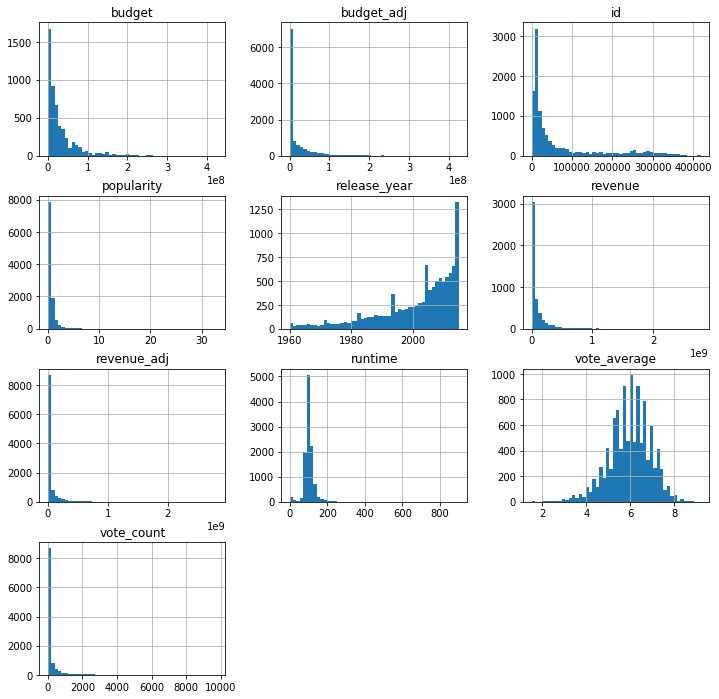

In [173]:
# Preview overall distribution 
df.hist(figsize = (12,12), bins=50);

In [174]:
#function bar plot
def bar_plot(columns,xlabel,ylabel,title,x,color):
    release_year = df[columns].value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel , fontsize=15)
    ax.set_title(title, fontsize=15, fontweight='bold')
    release_year[:x].plot(ax=ax, kind='bar', color=color)
    return
    

###  Research Question 1: Which year has the highest release of movies?

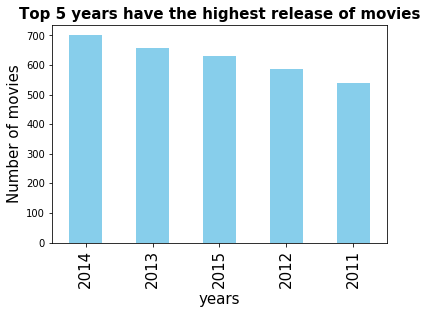

In [175]:
#call function bar_plot
bar_plot('release_year','years','Number of movies','Top 5 years have the highest release of movies',5,'skyblue')

If it was the highest release of movies in 2014 when the number of the movie was nearly 700.

###  Research Question 2: What is the highest revenue movie?

In [176]:
highrevenue = df['revenue'].max() #Calculate the highest revenue

movie = df[df['revenue']== highrevenue] 

In [177]:
print("Highest revenue equals:",highrevenue)
print('------------------')
print("So the highest revenue movie is ( id - title ):\n" , movie['original_title'],"\n year ",movie['release_year'])

Highest revenue equals: 2781505847.0
------------------
So the highest revenue movie is ( id - title ):
 1386    Avatar
Name: original_title, dtype: object 
 year  1386    2009
Name: release_year, dtype: int64


### Research Question 3: What is the least revenue movie?

In [178]:
leastrevenue = df['revenue'].min()#Calculate the lowest revenue

movier = df[df['revenue']== leastrevenue]

In [179]:
print("the least revenue equals:",leastrevenue)

print("So the least revenue movies are ( id - title ):\n" , movier['original_title'],"\n year ",movier['release_year'])

the least revenue equals: 2.0
So the least revenue movies are ( id - title ):
 5067    Shattered Glass
8142           Mallrats
Name: original_title, dtype: object 
 year  5067    2003
8142    1995
Name: release_year, dtype: int64


### Research Question 4: What is the average revenue of the movies?

In [180]:
# find average of a revenue
df['revenue'].mean()


89238858.70798102

In [181]:
#More details about a revenue
df['revenue'].describe()

count    4.849000e+03
mean     8.923886e+07
std      1.620801e+08
min      2.000000e+00
25%      7.732325e+06
50%      3.185308e+07
75%      9.996575e+07
max      2.781506e+09
Name: revenue, dtype: float64

<b>The average Budget of movies is 89238858.70 </b>

### Research Question 5: what is the average runtime of all movies?

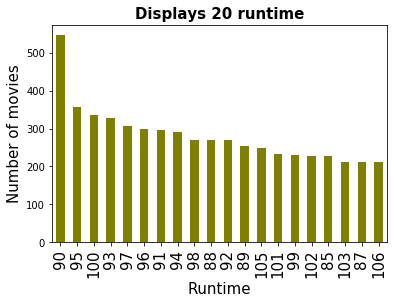

In [182]:
#call function bar plot
bar_plot('runtime','Runtime','Number of movies','Displays 20 runtime',20,'olive')

In [183]:
# find average of a runtime 
df['runtime'].mean()


102.07179015186378

In [184]:
#More details about a runtime.
df['runtime'].describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

<b>The average runtime of movies is 102.07 minutes.</b>

### Research Question 6: what is the highest budget movie?

In [185]:
highbudget = df['budget'].max() #Calculate the highest budget

moviebh = df[df['budget']== highbudget] 

In [186]:
print("Highest budget equals:",highbudget)

print("So the highest budget movie is ( id - title ):\n" , moviebh['original_title'])

Highest budget equals: 425000000.0
So the highest budget movie is ( id - title ):
 2244    The Warrior's Way
Name: original_title, dtype: object


### Research Question 7: what is the least budget movie?


In [187]:
leastbudget = df['budget'].min()#Calculate the lowest budget

movieb = df[df['budget']== leastbudget]

In [188]:
print("the least budget equals:",leastbudget)

print("So the least budget movies are ( id - title ):\n" , movieb['original_title'])

the least budget equals: 1.0
So the least budget movies are ( id - title ):
 1151                           Fear Clinic
2618                          Lost & Found
3065    Angus, Thongs and Perfect Snogging
3581               Love, Wedding, Marriage
Name: original_title, dtype: object


### Research Question 8: What is the average Budget of the movies?


In [189]:
# find average of a budget
df['budget'].mean()

30739575.95066744

In [190]:
#More details about a budget
df['budget'].describe()

count    5.169000e+03
mean     3.073958e+07
std      3.890441e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

<b>The average Budget of movies is 30739575.95 </b>

<a id='conclusions'></a>
## Conclusions

Finally, we can summarize our findings and answer questions.
<ul>
<li>The highest release of movies was 2014, the number of the movies nearly 700.</li>
<li>Movies that achieved the highest revenues were in the year 2009 and the lowest revenues in the year 2003 and 1995.The average revenue of the movies equal to 39823319.7.</li>
<li>Average runtime of the movies equals 102.07 minutes.</li>
<li>The Warrior's Way has the highest budget and  'Fear Clinic', 'Lost & Found', 'Angus', 'Thongs and Perfect Snogging' and 'Love, Wedding, Marriage' has The lowest budget.</li></ul>

Limitations: There is a lot of data missing in the Revenue and Budget columns. So, I replaced the 0 values with null values, because these large missing values ​​can cause strong analysis bias.





## References

<b>Dataset:<b>
<a href="https://www.kaggle.com/tmdb/tmdb-movie-metadata">https://www.kaggle.com/tmdb/tmdb-movie-metadata</a>

<b>Max:</b>
<a href="https://www.geeksforgeeks.org/python-pandas-dataframe-max/">https://www.geeksforgeeks.org/python-pandas-dataframe-max/</a>

<b>Min:</b>
<a href="https://www.geeksforgeeks.org/python-pandas-dataframe-min/">https://www.geeksforgeeks.org/python-pandas-dataframe-min/</a>


<b>bar chart:</b>
<a href="https://www.blakeporterneuro.com/learning-python-project-1-how-to-find-a-job-using-twitters-api-and-python/"> https://www.blakeporterneuro.com/learning-python-project-1-how-to-find-a-job-using-twitters-api-and-python/</a>
